I obtained spectra for 107 of the 242 candidates. 40 of the spectra did not show features of a quasar, 28 of them were confirmed to be quasars. and the remaining 40-ish are not yet analyzed (there may be more quasars in there). 

Classifcation could be --> 1) Qusars, AGN, non-quasar, 2) Quasars, non-quasars

Supplement photos as part of the data

Supplement traning data to explore

ch1 = 3.6, ch2 = 4.5

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.table import Table as tb

In [28]:
with fits.open('data/raw/glikman.fits') as hdu:
    table = tb(hdu[1].data)
df = pd.DataFrame(np.array(table))
    

In [26]:
with fits.open('data/FIRST.fits') as hdu:
    table_f = tb(hdu[1].data)
first = pd.DataFrame(np.array(table_f))

In [5]:
qso = []
for i in df['class']:
    if i == 'QSO' or i == 'QSO?' or i == 'QSO??':
        qso.append(1)
    else:
        qso.append(0)
        
df['qso'] = qso

In [6]:
class_cleaned = []
for i in df['class']:
    if i == 'QSO' or i == 'QSO?' or i == 'QSO??':
        class_cleaned.append('QSO')
    else:
        class_cleaned.append(i)
        
df['class_cleaned'] = class_cleaned

In [7]:
count_class = pd.DataFrame(df['class_cleaned'].value_counts()).reset_index()
count_class.rename(columns = {'index' : 'class_cleaned','class_cleaned':'occ'},inplace = True)

In [8]:
count_class

,class_cleaned,occ
0,none,165
1,QSO,27
2,??,20
3,?,20
4,QSO/AGN,2
5,weak-det,2
6,AGN,2
7,star,2
8,NL??,1
9,NLAGN,1


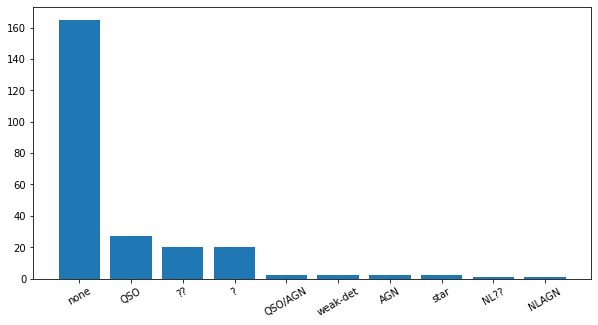

In [9]:
plt.figure(figsize = (10,5))
plt.bar(count_class['class_cleaned'],count_class['occ'])
plt.xticks(rotation = 30)
plt.savefig('class_freq.png')

## Testing Linear Separability

### 1. for color [r-k,j-k,g-j]

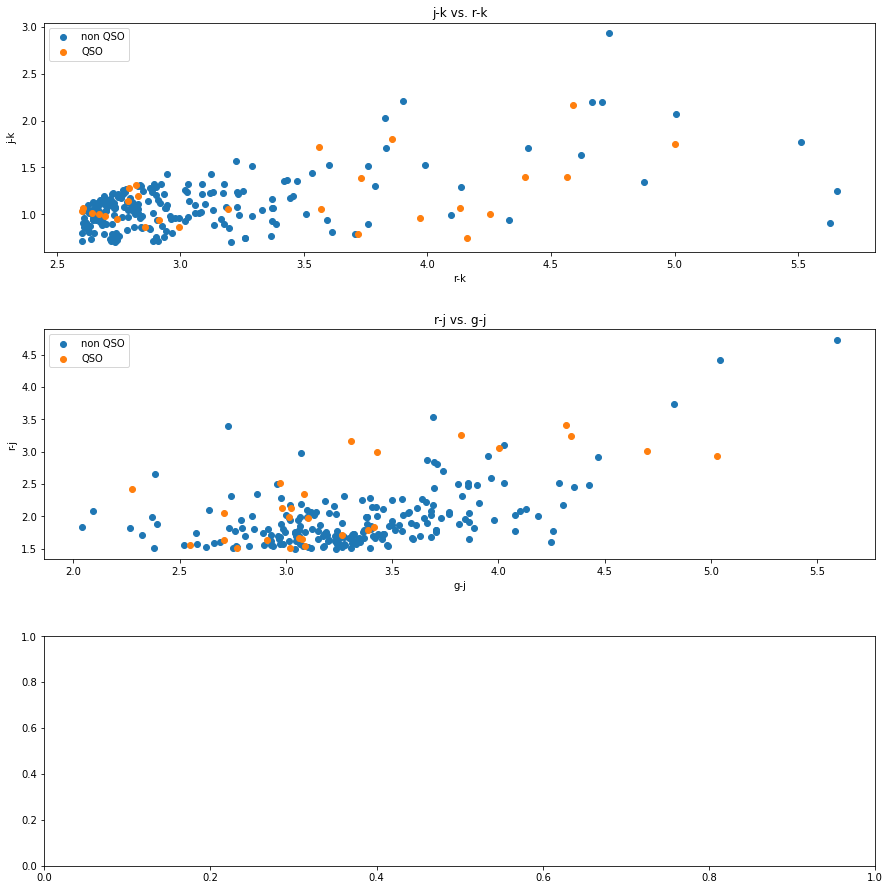

In [10]:
groups = df.groupby('qso')


fig,(ax1, ax2, ax3) = plt.subplots(3, figsize = (13,13))
for name,group in groups:
    if name == 1:
        ax1.scatter(group['rk'],group['jk'],label = 'QSO')
    else:
        ax1.scatter(group['rk'],group['jk'],label = 'non QSO')

ax1.set_xlabel('r-k')
ax1.set_ylabel('j-k')
ax1.set_title('j-k vs. r-k')
ax1.legend(loc = 2)

for name,group in groups:
    if name == 1:
        ax2.scatter(group['gj'],group['rj'],label = 'QSO')
    else:
        ax2.scatter(group['gj'],group['rj'],label = 'non QSO')

ax2.set_xlabel('g-j')
ax2.set_ylabel('r-j')
ax2.set_title('r-j vs. g-j')
ax2.legend(loc = 2)
        
# for name,group in groups:
#     if name == 1:
#         ax3.scatter(group['rj'],group['jk'],label = 'QSO')
#     else:
#         ax3.scatter(group['rj'],group['jk'],label = 'non QSO')

# ax3.set_xlabel('r-j')
# ax3.set_ylabel('j-k')
# ax3.set_title('j-k vs. r-j')
# ax3.legend(loc = 2)

fig.tight_layout(pad=3.0)
plt.savefig('color_color.png')
        
# plt.xlabel('rk')
# plt.ylabel('jk')
# plt.title('jk vs. rk')
# plt.legend()


In [11]:
df.columns

Index(['counter', 'RA', 'DEC', 'G_MAG_AB', 'R_MAG_AB', 'Y_MAG_AB', 'J_MAG_AB',
       'H_MAG_AB', 'K_MAG_AB', 'ch1_mag', 'ch2_mag', 'gj', 'rj', 'jk', 'rk',
       'Fpk', 'Hpk', 'redshift', 'specObjID', 'class', 'qso', 'class_cleaned'],
      dtype='object')

### 2. colors Y,J,H,K,ch1_mag, ch2_mag

In [12]:
df['yj'] = df['Y_MAG_AB'] - df['J_MAG_AB']
df['jh'] = df['J_MAG_AB'] - df['H_MAG_AB']
df['hk'] = df['H_MAG_AB'] - df['K_MAG_AB']

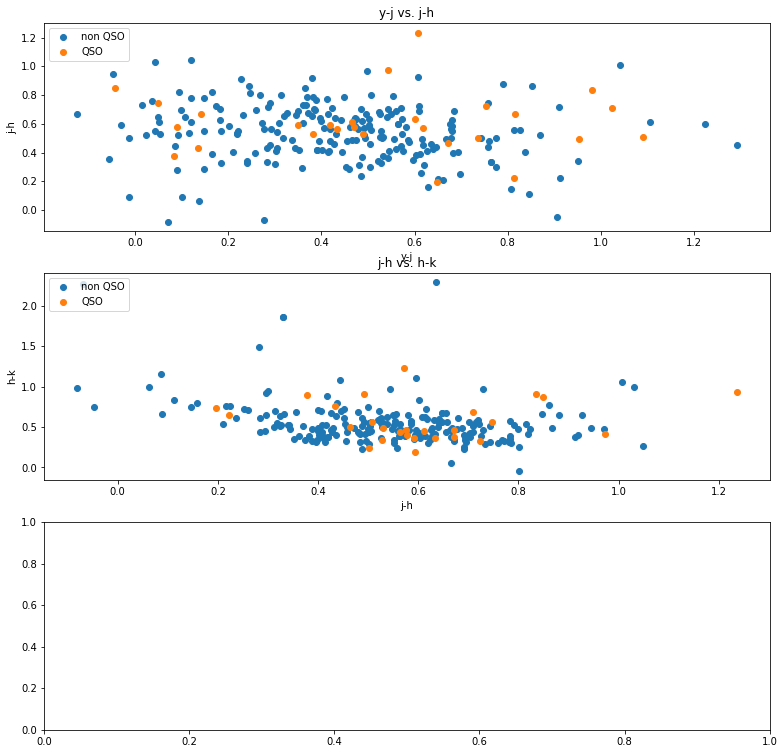

In [13]:
fig,(ax4, ax5, ax6) = plt.subplots(3, figsize = (13,13))
for name,group in groups:
    if name == 1:
        ax4.scatter(group['yj'],group['jh'],label = 'QSO')
    else:
        ax4.scatter(group['yj'],group['jh'],label = 'non QSO')

ax4.set_xlabel('y-j')
ax4.set_ylabel('j-h')
ax4.set_title('y-j vs. j-h')
ax4.legend(loc = 2)

for name,group in groups:
    if name == 1:
        ax5.scatter(group['jh'],group['hk'],label = 'QSO')
    else:
        ax5.scatter(group['jh'],group['hk'],label = 'non QSO')

ax5.set_xlabel('j-h')
ax5.set_ylabel('h-k')
ax5.set_title('j-h vs. h-k')
ax5.legend(loc = 2)

## New Data Set

In [24]:
df

,counter,RA,DEC,G_MAG_AB,R_MAG_AB,Y_MAG_AB,J_MAG_AB,H_MAG_AB,K_MAG_AB,ch1_mag,ch2_mag,gj,rj,jk,rk,Fpk,Hpk,redshift,specObjID,class
0,2,00:00:15.00,-00:34:43.5,24.210899,22.270300,20.068850,19.783270,19.064283,18.481094,17.634390,17.652925,4.427629,2.487030,1.302175,3.789205,-999.0,-999.0,-999.0,Gemini,none
1,3,00:00:16.67,+00:05:22.5,23.357599,21.678101,20.202389,19.708937,19.207716,18.771132,18.017138,17.556839,3.648662,1.969164,0.937805,2.906969,-999.0,-999.0,999.0,NIRES080218,?
2,4,00:00:32.18,+00:41:42.1,23.402100,21.956301,20.369802,19.740633,19.582993,18.790592,18.524115,18.444016,3.661466,2.215667,0.950041,3.165708,-999.0,-999.0,-999.0,0,none
3,5,00:00:35.67,+00:57:16.6,22.571400,21.464600,19.758677,19.176252,18.595570,18.133766,17.549580,17.564300,3.395147,2.288347,1.042486,3.330833,-999.0,-999.0,-999.0,0,none
4,6,00:00:46.11,-00:32:03.2,22.776501,21.186300,19.772924,19.500998,18.896547,18.531534,18.944500,18.713732,3.275503,1.685302,0.969463,2.654766,-999.0,-999.0,-999.0,0,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,239,23:58:39.99,-00:48:57.7,23.161200,21.356001,20.390093,19.708775,19.160656,18.689625,18.879488,18.875639,3.452425,1.647226,1.019150,2.666376,-999.0,-999.0,-999.0,0,none
238,240,23:58:59.67,-00:20:31.5,24.173901,22.163799,20.292862,20.045828,19.230950,18.689875,17.564264,17.570740,4.128072,2.117971,1.355953,3.473924,-999.0,-999.0,-999.0,NIRES091818,none
239,241,23:59:05.67,-00:17:38.2,23.045601,21.447901,20.192467,19.723139,19.098528,18.637936,19.012070,18.926954,3.322462,1.724762,1.085203,2.809965,-999.0,-999.0,-999.0,NIRES092218,none
240,242,23:59:19.39,+00:05:31.7,23.078400,21.648600,20.024931,19.888184,19.825838,18.824001,18.114698,17.913889,3.190216,1.760416,1.064182,2.824598,-999.0,-999.0,-999.0,0,none
